<a href="https://colab.research.google.com/github/dinasoffa/Numerical-Optimization/blob/main/G_D_Batch%26Mini_Batch%26Stochastic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# develop a Python program that is able to implement the gradient descent variants (Batch/Mini-Batch/Stochastic) in order to achieve the linear regression of a set of datapoints.
###notice that we will apply these algorithm to single variable LR.

# Batch

#### import libraries

In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
from sklearn.metrics import r2_score

In [2]:
X = np.linspace(0,20)
X

array([ 0.        ,  0.40816327,  0.81632653,  1.2244898 ,  1.63265306,
        2.04081633,  2.44897959,  2.85714286,  3.26530612,  3.67346939,
        4.08163265,  4.48979592,  4.89795918,  5.30612245,  5.71428571,
        6.12244898,  6.53061224,  6.93877551,  7.34693878,  7.75510204,
        8.16326531,  8.57142857,  8.97959184,  9.3877551 ,  9.79591837,
       10.20408163, 10.6122449 , 11.02040816, 11.42857143, 11.83673469,
       12.24489796, 12.65306122, 13.06122449, 13.46938776, 13.87755102,
       14.28571429, 14.69387755, 15.10204082, 15.51020408, 15.91836735,
       16.32653061, 16.73469388, 17.14285714, 17.55102041, 17.95918367,
       18.36734694, 18.7755102 , 19.18367347, 19.59183673, 20.        ])

In [3]:
X.shape

(50,)

In [4]:
a=-2
b=1
y=a*X+b
y

array([  1.        ,   0.18367347,  -0.63265306,  -1.44897959,
        -2.26530612,  -3.08163265,  -3.89795918,  -4.71428571,
        -5.53061224,  -6.34693878,  -7.16326531,  -7.97959184,
        -8.79591837,  -9.6122449 , -10.42857143, -11.24489796,
       -12.06122449, -12.87755102, -13.69387755, -14.51020408,
       -15.32653061, -16.14285714, -16.95918367, -17.7755102 ,
       -18.59183673, -19.40816327, -20.2244898 , -21.04081633,
       -21.85714286, -22.67346939, -23.48979592, -24.30612245,
       -25.12244898, -25.93877551, -26.75510204, -27.57142857,
       -28.3877551 , -29.20408163, -30.02040816, -30.83673469,
       -31.65306122, -32.46938776, -33.28571429, -34.10204082,
       -34.91836735, -35.73469388, -36.55102041, -37.36734694,
       -38.18367347, -39.        ])

### Plot X vs. y

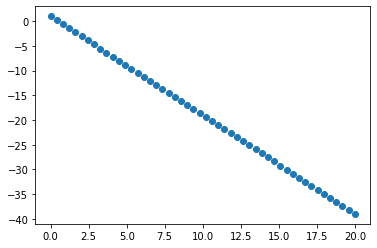

In [5]:
plt.scatter(X,y)
plt.show()

#### function with any input parameterss of your choice.
##### The following results uses alpha = 0.0005 and max. iterations = 300.

In [6]:
def G_D(X ,y , alpha ,epoch):
    theta_0 , theta_1 = 0,0
    loss=[]
    Theta_0=[]
    Theta_1=[]
    H =[]
    ch=0
    for i in range(epoch):
        print(f"\n******* Iteration {i} *******")
        h_x = theta_0 + theta_1 * X
        H.append(h_x)
        print("h(x):" ,h_x)
        err=(h_x - y)
        m_2 = 2*len(X)
        j = 1/m_2 * sum(err**2)
        
        print("\nError Vector:\n" , err)
        print("\nj = " ,j)
        d_theta_0=  1/len(X) * sum((err))
        d_theta_1= 1/len(X) * sum((err)* X)
        G_V= np.array([[d_theta_0],
                       [d_theta_1]])
        print("\nGradient Vector :\n",G_V)
        G_norm = np.linalg.norm(G_V)
        print("\nGradient Vector Norm :\n",G_norm)
        
        
        
        if i >20:
            if abs(loss[-1] -loss[-2]) <= 0.001:
                ch=1
    
        if G_norm <= 0.001 or ch == 1:
            break
        theta_0 = theta_0 - alpha * d_theta_0 
        theta_1 = theta_1 - alpha * d_theta_1 
        Theta_0.append(theta_0)
        Theta_1.append(theta_1)
        loss.append(j)

        print("\ntheta_0_new : ",theta_0)
        print("theta_1_new : ",theta_1)
        
    # ****** Training Report ********
    print("\n******* Training Report *******")
    print(f"\nGradient Descent converged after {i+1} iterations")
    print("\ntheta_0_Opt : " ,theta_0)
    print("theta_1_Opt : " ,theta_1)
    print("\nError Vector: ",err)
    print("\ncost : ",j)
    print("\nh(x) = y_predict: \n" ,h_x)
    print("\ny_actual:\n" , y)
    print()    
        
    return Theta_0, Theta_1 , H ,  loss,i

In [7]:
Theta_0, Theta_1, H, loss,i= G_D(X ,y , 0.0005 ,300)


******* Iteration 0 *******
h(x): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
 [-1.         -0.18367347  0.63265306  1.44897959  2.26530612  3.08163265
  3.89795918  4.71428571  5.53061224  6.34693878  7.16326531  7.97959184
  8.79591837  9.6122449  10.42857143 11.24489796 12.06122449 12.87755102
 13.69387755 14.51020408 15.32653061 16.14285714 16.95918367 17.7755102
 18.59183673 19.40816327 20.2244898  21.04081633 21.85714286 22.67346939
 23.48979592 24.30612245 25.12244898 25.93877551 26.75510204 27.57142857
 28.3877551  29.20408163 30.02040816 30.83673469 31.65306122 32.46938776
 33.28571429 34.10204082 34.91836735 35.73469388 36.55102041 37.36734694
 38.18367347 39.        ]

j =  249.88775510204084

Gradient Vector :
 [[ 19.       ]
 [259.3877551]]

Gradient Vector Norm :
 260.0826935743251

theta_0_new :  -0.0095
theta_1_new :  -0.1296938775510204

*******

#### Calculate r2 score

In [8]:
r2_score(H[-1], y)

0.9973071741665837

#### Plot loss vs. epochs

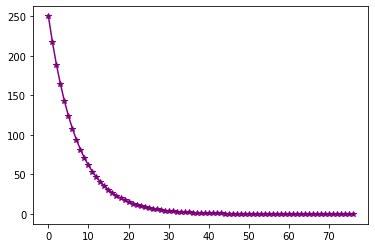

In [9]:
plt.plot(np.arange(0,i), loss, marker='*', color="purple")

#### Plot Theta_0 vs. loss and Theta_1 vs. loss

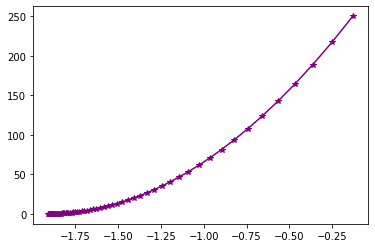

In [10]:
plt.plot(Theta_1, loss, marker='*', color="purple")

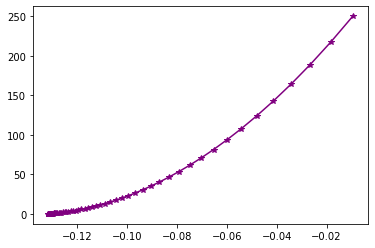

In [11]:
plt.plot(Theta_0, loss, marker='*', color="purple")

#### Plot all regression lines till converge

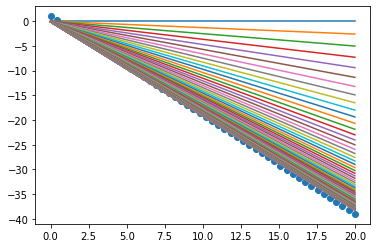

In [12]:
plt.scatter(X,y)
for i in H:
  plt.plot(X,i)

#### Plot the best regression line

Text(0, 0.5, 'y')

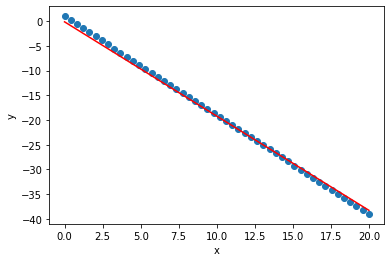

In [13]:

plt.scatter(X,y)
plt.plot(X,H[-1], color='r')
plt.xlabel("x")
plt.ylabel("y")

##### The following results uses alpha = 0.005 and max. iterations = 300.

In [14]:
Theta_0, Theta_1, H, loss,i= G_D(X ,y , 0.005 ,300)


******* Iteration 0 *******
h(x): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
 [-1.         -0.18367347  0.63265306  1.44897959  2.26530612  3.08163265
  3.89795918  4.71428571  5.53061224  6.34693878  7.16326531  7.97959184
  8.79591837  9.6122449  10.42857143 11.24489796 12.06122449 12.87755102
 13.69387755 14.51020408 15.32653061 16.14285714 16.95918367 17.7755102
 18.59183673 19.40816327 20.2244898  21.04081633 21.85714286 22.67346939
 23.48979592 24.30612245 25.12244898 25.93877551 26.75510204 27.57142857
 28.3877551  29.20408163 30.02040816 30.83673469 31.65306122 32.46938776
 33.28571429 34.10204082 34.91836735 35.73469388 36.55102041 37.36734694
 38.18367347 39.        ]

j =  249.88775510204084

Gradient Vector :
 [[ 19.       ]
 [259.3877551]]

Gradient Vector Norm :
 260.0826935743251

theta_0_new :  -0.095
theta_1_new :  -1.296938775510204

******* I

In [15]:
r2_score(y,H[-1])

0.9977044263931797

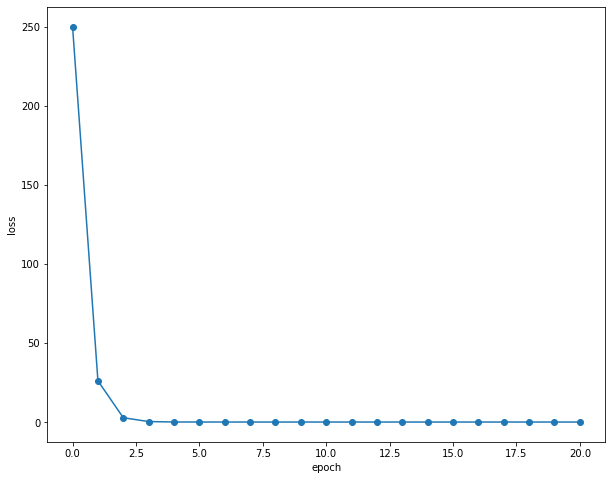

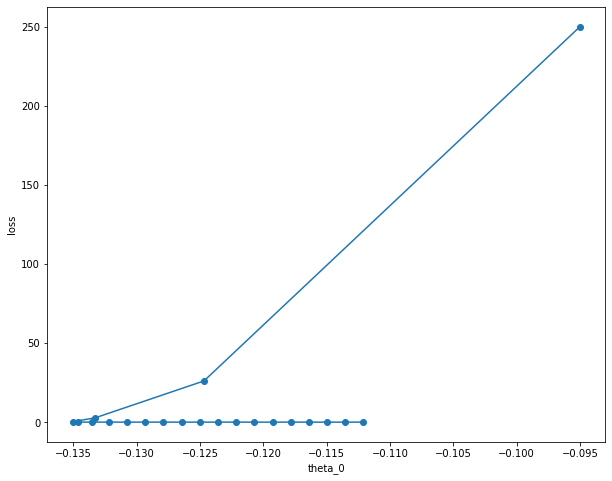

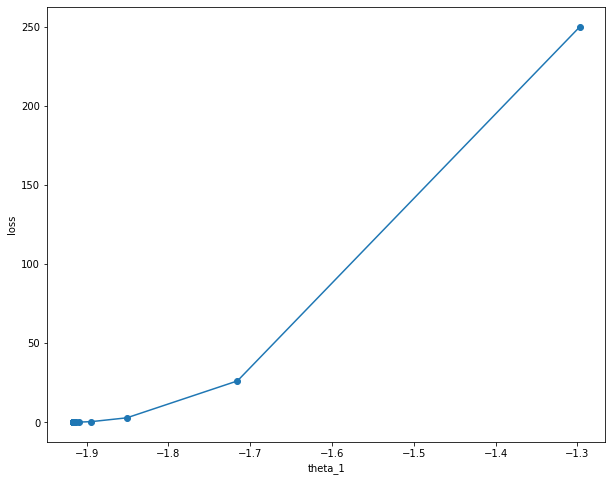

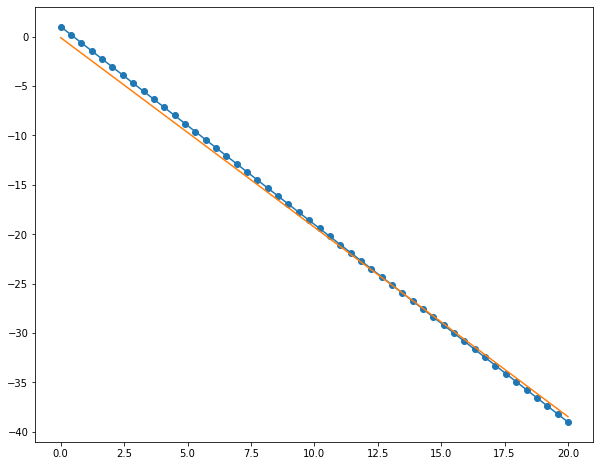

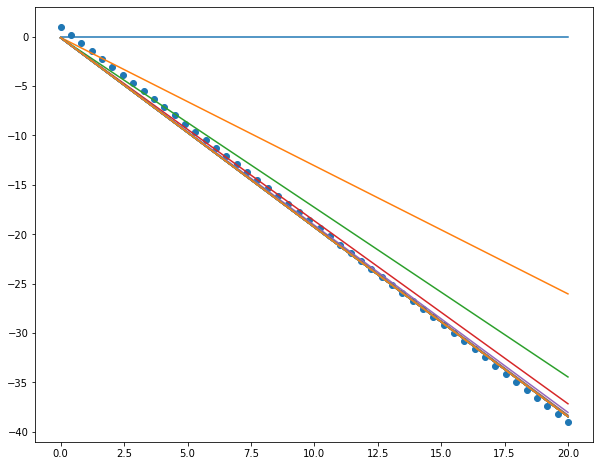

In [16]:
plt.figure(figsize=(10,8))
plt.plot(np.arange(0,i),loss, marker='o')
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()
plt.figure(figsize=(10,8))
plt.plot(Theta_0,loss, marker='o')
plt.xlabel("theta_0")
plt.ylabel("loss")
plt.show()
plt.figure(figsize=(10,8))
plt.plot(Theta_1,loss, marker='o')
plt.xlabel("theta_1")
plt.ylabel("loss")
plt.show()
plt.figure(figsize=(10,8))
plt.plot(X,y)
plt.scatter(X,y)
plt.plot(X,H[-1])
plt.show()
plt.figure(figsize=(10,8))
plt.scatter(X,y)
for k in H:
  plt.plot(X,k)



## Stochastic GD

In [17]:
def Stochastic(X ,y , alpha ,epoch):
    data= np.concatenate((X.reshape(-1,1),y.reshape(-1,1)),axis=1)
    np.random.shuffle(data)
    X = data[:,0]
    y = data[:,1]
    
    m = len(X)
    theta_0 , theta_1 = 0,0
    loss=[]
    Theta_0=[]
    Theta_1=[]
    loss_e=[]
    ch=0
    
    
    for e in range(0,epoch):
        for i in range(0,m):
            Theta_0.append(theta_0)
            Theta_1.append(theta_1)
            
            h_x = theta_0 + theta_1 * X[i]
            err= (h_x - y[i])
            j = (1/2) * (err**2)
            loss.append(j)
            
            d_theta_0= err
            d_theta_1= err * X[i]
            
            d_v= np.array([[d_theta_0],
                           [d_theta_1]])
            
            G_norm = np.linalg.norm(d_v)
            
            theta_0 = theta_0 - alpha * d_theta_0 
            theta_1 = theta_1 - alpha * d_theta_1 
            
        print(f"\n******* Epoch {e} *******")
        print("\ncost :\n",j)
        print("\nGradient Vector :\n",d_v)
        print("\nGradient Vector Norm :\n",G_norm)
        print("\ntheta_0_new : ",theta_0)
        print("theta_1_new : ",theta_1)
        
       
        
        if e>1 and abs(loss[e*m] - loss[(e-1)*m]) <= 0.001:
            break
    
        if G_norm <= 0.001:
            break
        
        
    # ****** Training Report ********
    print("\n******* Training Report *******")
    print(f"\nGradient Descent converged after {i+1} iterations {e} Epochs")
    
    print("\ntheta_0_Opt : " ,theta_0)
    print("theta_1_Opt : " ,theta_1)
    print("\ncost : ",j)
    print()    
    
    
    return Theta_0, Theta_1 , loss

##### The following results uses alpha = 0.0005 and max. iterations = 300.

In [18]:
Theta_0, Theta_1 , loss=Stochastic(X ,y , 0.0005 ,300)


******* Epoch 0 *******

cost :
 0.21262541071271074

Gradient Vector :
 [[0.65211258]
 [8.25122044]]

Gradient Vector Norm :
 8.276949294288986

theta_0_new :  -0.14264300334004243
theta_1_new :  -1.8623077924927067

******* Epoch 1 *******

cost :
 0.0008111190006001662

Gradient Vector :
 [[-0.04027702]
 [-0.50962755]]

Gradient Vector Norm :
 0.5112166609455091

theta_0_new :  -0.13936066400741956
theta_1_new :  -1.9128805321147007

******* Epoch 2 *******

cost :
 0.0017118219227302354

Gradient Vector :
 [[-0.05851191]
 [-0.7403548 ]]

Gradient Vector Norm :
 0.7426633698461697

theta_0_new :  -0.13220290193010878
theta_1_new :  -1.914771287035314

******* Epoch 3 *******

cost :
 0.0017190694207451804

Gradient Vector :
 [[-0.05863564]
 [-0.7419204 ]]

Gradient Vector Norm :
 0.7442338504582933

theta_0_new :  -0.12498609353603746
theta_1_new :  -1.9153506388930137

******* Training Report *******

Gradient Descent converged after 50 iterations 3 Epochs

theta_0_Opt :  -0.12498

In [19]:
y_pred=Theta_0[-1]+(Theta_1[-1]*X)

In [20]:
r2_score(y, y_pred)

0.9976503063649296

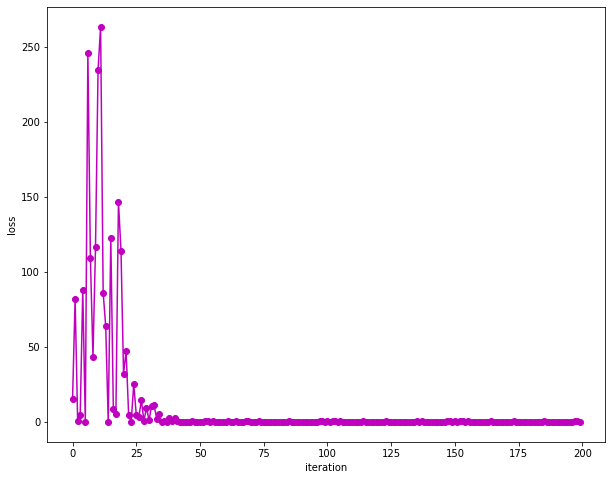

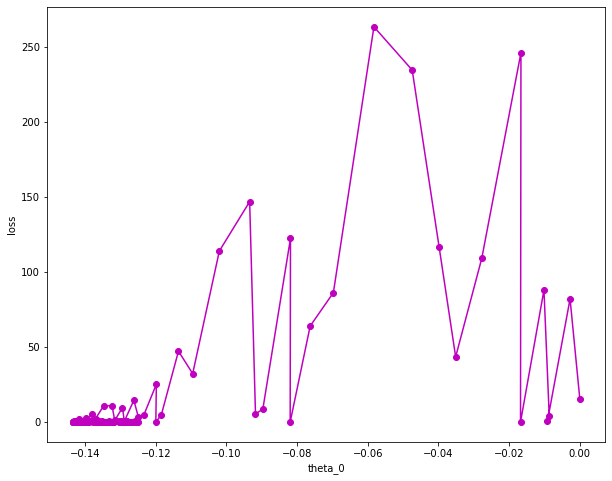

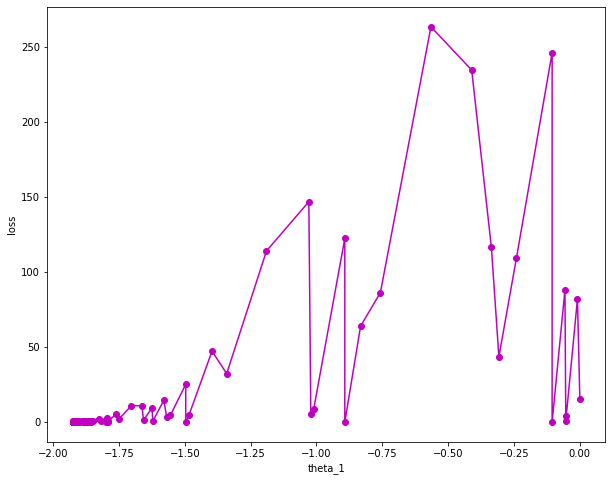

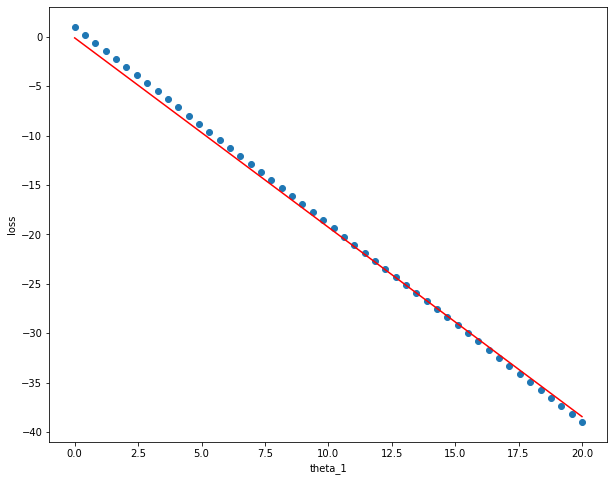

In [21]:
plt.figure(figsize=(10,8))
plt.plot(loss,'-mo')
plt.xlabel("iteration")
plt.ylabel("loss")
plt.show()
plt.figure(figsize=(10,8))
plt.plot(Theta_0,loss,'-mo')
plt.xlabel("theta_0")
plt.ylabel("loss")
plt.show()
plt.figure(figsize=(10,8))
plt.plot(Theta_1,loss,'-mo')
plt.xlabel("theta_1")
plt.ylabel("loss")
plt.show()
plt.figure(figsize=(10,8))
plt.scatter(X,y)
plt.plot(X,y_pred,color='r')
plt.xlabel("theta_1")
plt.ylabel("loss")
plt.show()

##### The following results uses alpha = 0.0001 and max. iterations = 300.

In [22]:
Theta_0, Theta_1 , loss=Stochastic(X ,y , 0.0001 ,300)


******* Epoch 0 *******

cost :
 82.60741546596608

Gradient Vector :
 [[ 12.85359214]
 [167.88365246]]

Gradient Vector Norm :
 168.37498505715595

theta_0_new :  -0.06995085513551884
theta_1_new :  -0.9508655149046724

******* Epoch 1 *******

cost :
 20.815205696927254

Gradient Vector :
 [[ 6.45216331]
 [84.27315345]]

Gradient Vector Norm :
 84.51978942303823

theta_0_new :  -0.10446255782468845
theta_1_new :  -1.4299225466265433

******* Epoch 2 *******

cost :
 5.208179350159851

Gradient Vector :
 [[ 3.22743841]
 [42.15429762]]

Gradient Vector Norm :
 42.277667468198985

theta_0_new :  -0.12112252839336508
theta_1_new :  -1.6713034428732834

******* Epoch 3 *******

cost :
 1.2847968137017483

Gradient Vector :
 [[ 1.60299521]
 [20.93708023]]

Gradient Vector Norm :
 20.9983552248912

theta_0_new :  -0.12879052345018788
theta_1_new :  -1.7929536361168954

******* Epoch 4 *******

cost :
 0.3078789997309563

Gradient Vector :
 [[ 0.78470249]
 [10.24917539]]

Gradient Vector No

In [23]:
r2_score(y,H[-1])

0.9977044263931797

In [24]:
y_pred=Theta_0[-1]+(Theta_1[-1]*X)

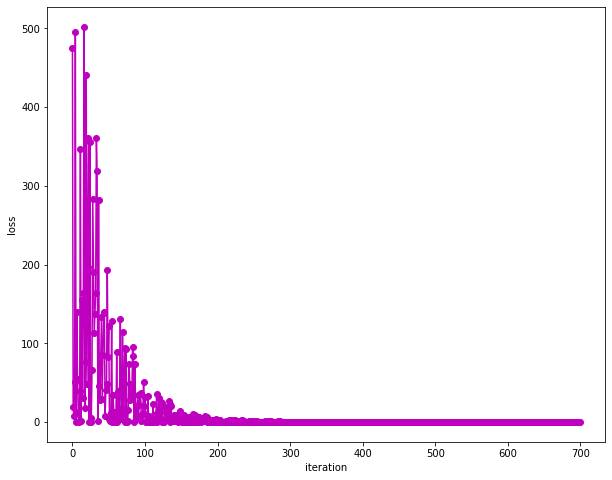

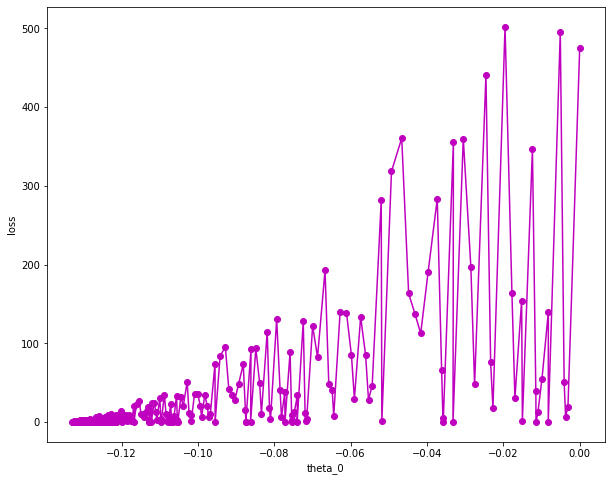

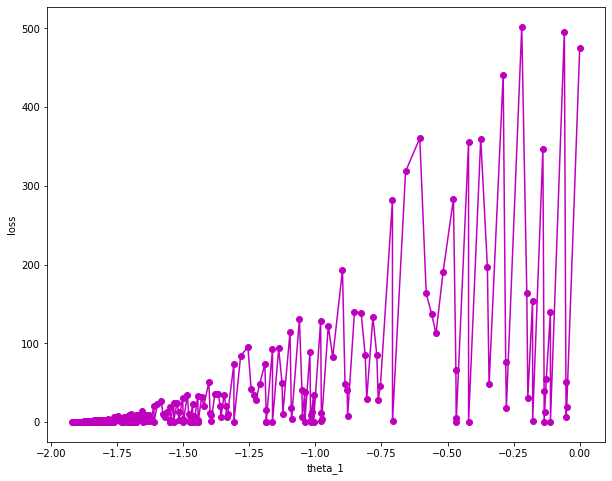

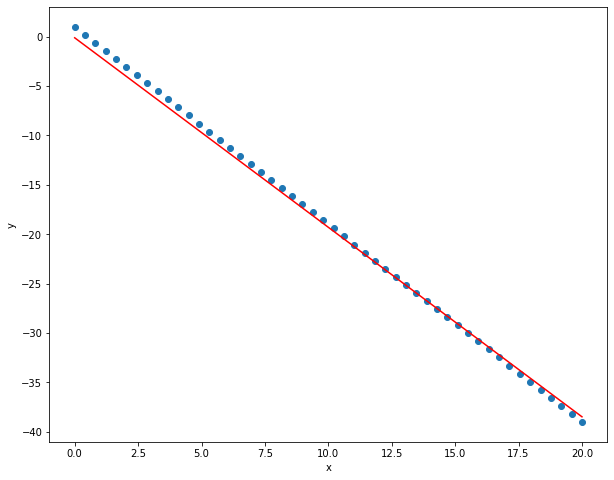

In [25]:
plt.figure(figsize=(10,8))
plt.plot(loss,'-mo')
plt.xlabel("iteration")
plt.ylabel("loss")
plt.show()
plt.figure(figsize=(10,8))
plt.plot(Theta_0,loss,'-mo')
plt.xlabel("theta_0")
plt.ylabel("loss")
plt.show()
plt.figure(figsize=(10,8))
plt.plot(Theta_1,loss,'-mo')
plt.xlabel("theta_1")
plt.ylabel("loss")
plt.show()
plt.figure(figsize=(10,8))
plt.scatter(X,y)
plt.plot(X,y_pred,color='r')
plt.xlabel("x")
plt.ylabel("y")
plt.show()

## Mini-Batch GD

In [26]:
def m_b(X ,y , alpha ,epoch,size_batch):
    D= np.concatenate((X.reshape(-1,1),y.reshape(-1,1)),axis=1)
    np.random.shuffle(D)
    X = D[:,0]
    y = D[:,1]
    
    m = len(X)
    theta_0 , theta_1 = 0,0
    loss=[]
    Theta_0=[]
    Theta_1=[]
    ch=0
    min_batch=m //size_batch


    for e in range(0,epoch):
        for b in range(0,min_batch):
          star=(b*size_batch)
          end=(b*size_batch)+size_batch
          Theta_0.append(theta_0)
          Theta_1.append(theta_1)
            
          h_x = theta_0 + theta_1 * X[star:end]
          err= (h_x - y[star:end])
          j = (1/(2*size_batch)) * sum(err**2)
          loss.append(j)
            
          d_theta_0= sum(err)/size_batch
          d_theta_1= sum(err * X[star:end])/size_batch
            
          G_V= np.array([[d_theta_0],
                           [d_theta_1]])
            
          G_norm = np.linalg.norm(G_V)
            
          theta_0 = theta_0 - (alpha * d_theta_0 )
          theta_1 = theta_1 - (alpha * d_theta_1) 
            
        print(f"\n******* Epoch {e} *******")
        print("\ncost :\n",j)
        print("\nGradient Vector :\n",G_V)
        print("\nGradient Vector Norm :\n",G_norm)
        print("\ntheta_0_new : ",theta_0)
        print("theta_1_new : ",theta_1)


        if e>0 and abs(loss[e*min_batch] - loss[(e-1)*min_batch]) <= 0.001:
           break  
    
        if G_norm <= 0.001:
           break  
       
        
        
    # ****** Training Report ********
    print("\n******* Training Report *******")
    print(f"\nGradient Descent converged after {i+1} iterations {e} Epochs")
    
    print("\ntheta_0_Opt : " ,theta_0)
    print("theta_1_Opt : " ,theta_1)
    print("\ncost : ",j)
    print()    
    
    
    return Theta_0, Theta_1 , loss

##### The following results uses batch size=5, alpha = 0.0005 and max. iterations = 300.

In [27]:
Theta_0, Theta_1 , loss=m_b(X ,y , 0.0005 ,300,5)


******* Epoch 0 *******

cost :
 41.78775175143627

Gradient Vector :
 [[ 6.29724497]
 [84.07573334]]

Gradient Vector Norm :
 84.31123430726309

theta_0_new :  -0.0703714685206188
theta_1_new :  -0.9680529768878088

******* Epoch 1 *******

cost :
 10.275079246373807

Gradient Vector :
 [[ 2.83121545]
 [41.2607272 ]]

Gradient Vector Norm :
 41.357748850421274

theta_0_new :  -0.1044374869008202
theta_1_new :  -1.4468874200523711

******* Epoch 2 *******

cost :
 2.6510573891529923

Gradient Vector :
 [[ 1.11735001]
 [20.08569634]]

Gradient Vector Norm :
 20.116750938604397

theta_0_new :  -0.12054850471405892
theta_1_new :  -1.6837641213781154

******* Epoch 3 *******

cost :
 0.8274908713290636

Gradient Vector :
 [[0.27006931]
 [9.61336255]]

Gradient Vector Norm :
 9.617155341482581

theta_0_new :  -0.12778028493683205
theta_1_new :  -1.8009733077793064

******* Epoch 4 *******

cost :
 0.40156484743048226

Gradient Vector :
 [[-0.14861643]
 [ 4.43436747]]

Gradient Vector Norm 

In [28]:
y_pred=Theta_0[-1]+Theta_1[-1]*X


In [29]:
r2_score(y,y_pred)

0.9976512037889826

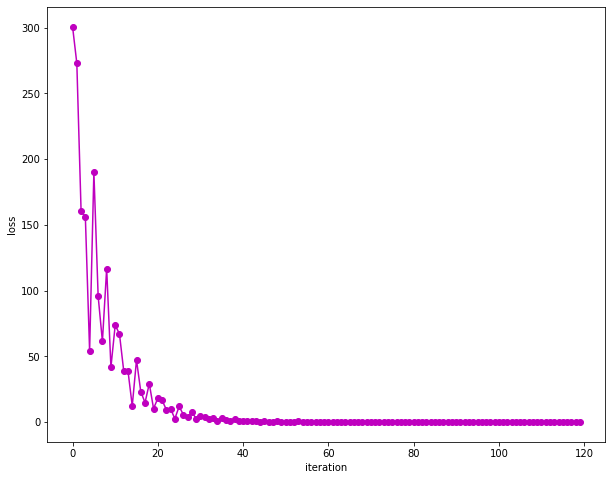

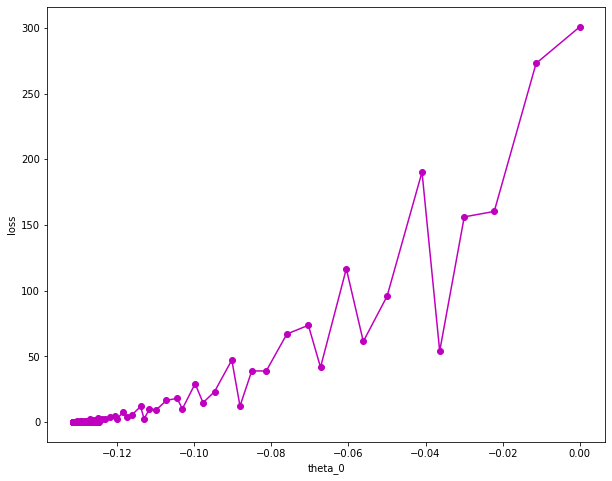

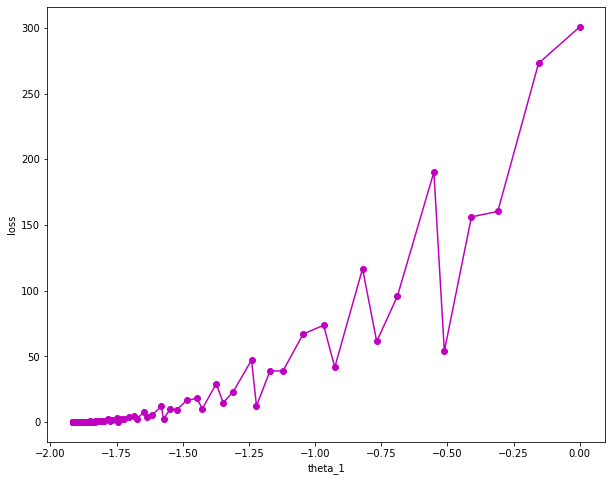

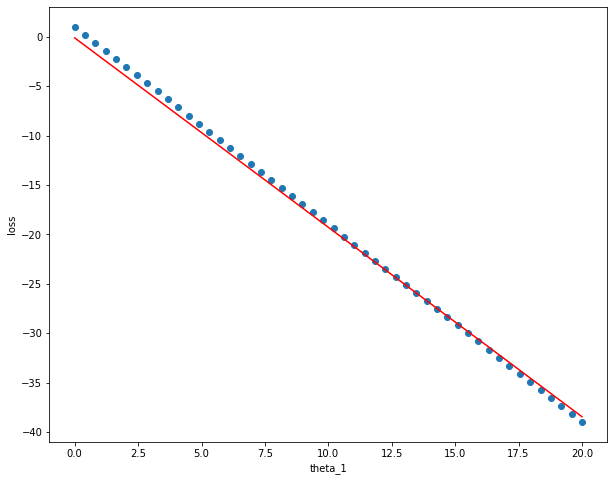

In [30]:
plt.figure(figsize=(10,8))
plt.plot(loss,'-mo')
plt.xlabel("iteration")
plt.ylabel("loss")
plt.show()
plt.figure(figsize=(10,8))
plt.plot(Theta_0,loss,'-mo')
plt.xlabel("theta_0")
plt.ylabel("loss")
plt.show()
plt.figure(figsize=(10,8))
plt.plot(Theta_1,loss,'-mo')
plt.xlabel("theta_1")
plt.ylabel("loss")
plt.show()
plt.figure(figsize=(10,8))
plt.scatter(X,y)
plt.plot(X,y_pred,color='r')
plt.xlabel("theta_1")
plt.ylabel("loss")
plt.show()

##### The following results uses batch size=10, alpha = 0.0005 and max. iterations = 300.

In [31]:
Theta_0, Theta_1 , loss=m_b(X ,y , 0.0005 ,300,10)


******* Epoch 0 *******

cost :
 137.3793702167682

Gradient Vector :
 [[ 14.60291587]
 [189.90680591]]

Gradient Vector Norm :
 190.46742525105782

theta_0_new :  -0.041561466020163314
theta_1_new :  -0.568615518798042

******* Epoch 1 *******

cost :
 67.79697659742689

Gradient Vector :
 [[ 10.18569276]
 [133.34882419]]

Gradient Vector Norm :
 133.73726948345652

theta_0_new :  -0.07056826869067596
theta_1_new :  -0.96845281631343

******* Epoch 2 *******

cost :
 33.45138907798334

Gradient Vector :
 [[ 7.07978134]
 [93.58027661]]

Gradient Vector Norm :
 93.8477036182882

theta_0_new :  -0.090747416687806
theta_1_new :  -1.2496139339063148

******* Epoch 3 *******

cost :
 16.510480853063275

Gradient Vector :
 [[ 4.89591686]
 [65.61719603]]

Gradient Vector Norm :
 65.79959283512692

theta_0_new :  -0.10471955084616326
theta_1_new :  -1.447328051702298

******* Epoch 4 *******

cost :
 8.162791476775826

Gradient Vector :
 [[ 3.36038836]
 [45.95511295]]

Gradient Vector Norm :


In [32]:
y_pred=Theta_0[-1]+Theta_1[-1]*X

In [33]:
r2_score(y,y_pred)

0.9976443231471055

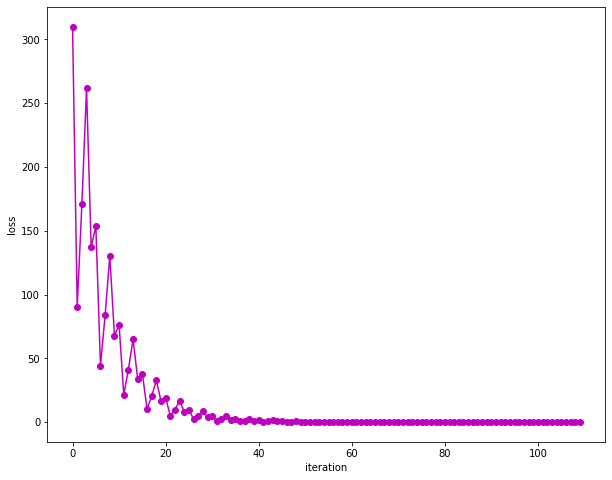

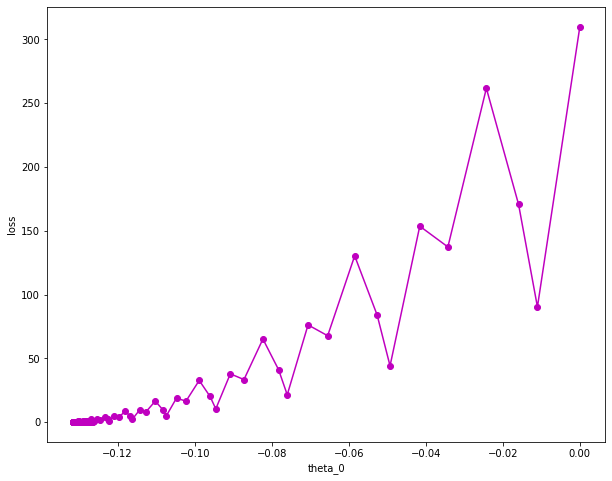

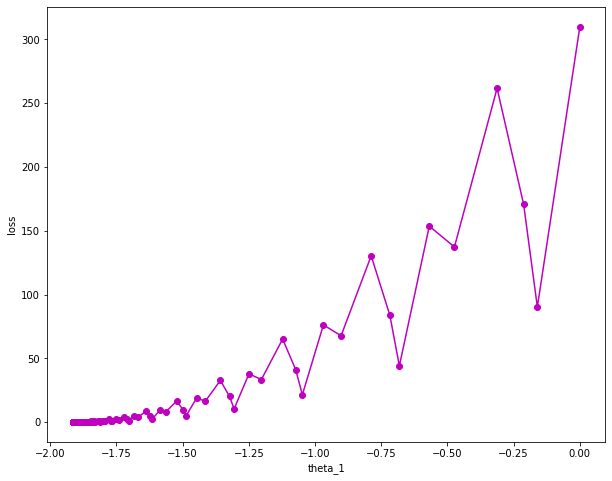

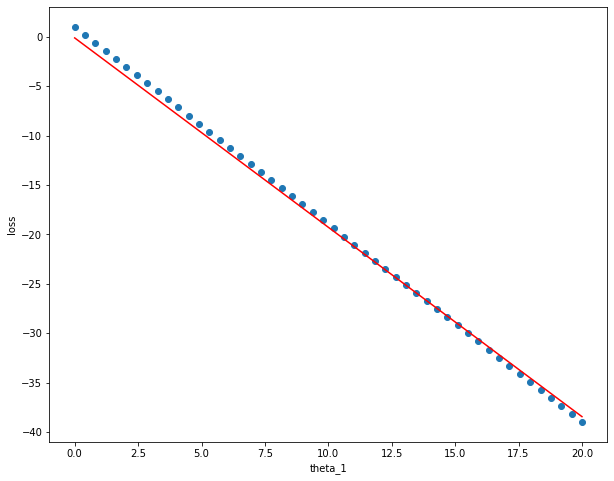

In [34]:
plt.figure(figsize=(10,8))
plt.plot(loss,'-mo')
plt.xlabel("iteration")
plt.ylabel("loss")
plt.show()
plt.figure(figsize=(10,8))
plt.plot(Theta_0,loss,'-mo')
plt.xlabel("theta_0")
plt.ylabel("loss")
plt.show()
plt.figure(figsize=(10,8))
plt.plot(Theta_1,loss,'-mo')
plt.xlabel("theta_1")
plt.ylabel("loss")
plt.show()
plt.figure(figsize=(10,8))
plt.scatter(X,y)
plt.plot(X,y_pred,color='r')
plt.xlabel("theta_1")
plt.ylabel("loss")
plt.show()